In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

#Import API Key
from api_keys import g_key

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Albania,ALB,1/10/2021,0,0,0,0,0,0,0,0,0,Pfizer/BioNTech,Ministry of Health
1,Albania,ALB,1/11/2021,0,0,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
2,Albania,ALB,1/12/2021,128,128,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
3,Albania,ALB,1/13/2021,188,188,0,60,63,0,0,0,22,Pfizer/BioNTech,Ministry of Health
4,Albania,ALB,1/14/2021,266,266,0,78,66,0,0,0,23,Pfizer/BioNTech,Ministry of Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Wales,0,2/6/2021,592228,589622,2606,32760,26854,18,18,0,8517,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2912,Wales,0,2/7/2021,606768,603976,2792,14540,27089,19,19,0,8592,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2913,Wales,0,2/8/2021,632251,628760,3491,25483,27364,20,19,0,8679,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2914,Wales,0,2/9/2021,659106,655419,3687,26855,27921,20,20,0,8856,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom


# Store Cleaned Data in DataFrame 1  
Question 1a:  Determine the Number of People Fully Vaccinated by Country and Graph

In [3]:
#Total number of people fully vaccinated by country
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count

England             60
Scotland            60
United Kingdom      60
Wales               60
Northern Ireland    60
                    ..
Algeria              2
Iran                 2
Greenland            1
Liechtenstein        1
Saint Helena         1
Name: country, Length: 85, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Albania                       439
Algeria                         0
Andorra                         0
Argentina                 1912283
Austria                    703280
                          ...    
Turkey                          0
United Arab Emirates       250000
United Kingdom           15206782
United States           140464500
Wales                       32642
Name: people_fully_vaccinated, Length: 85, dtype: int64

In [5]:
#Total number of people fully vaccinated by country
#Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_no_zero_df=pd.DataFrame(filtered_no_zero)
filtered_no_zero_df

#Create a sorted DF
fil_no_zero_df_sort=filtered_no_zero_df.sort_values("people_fully_vaccinated")
fil_no_zero_df_sort

,people_fully_vaccinated
country,
Albania,439
Guernsey,522
Faeroe Islands,2513
Bermuda,3191
Jersey,9360
Singapore,12100
Cayman Islands,13141
Cyprus,17632
Seychelles,22606


Text(0, 0.5, 'No. of People Fully Vaccinated')

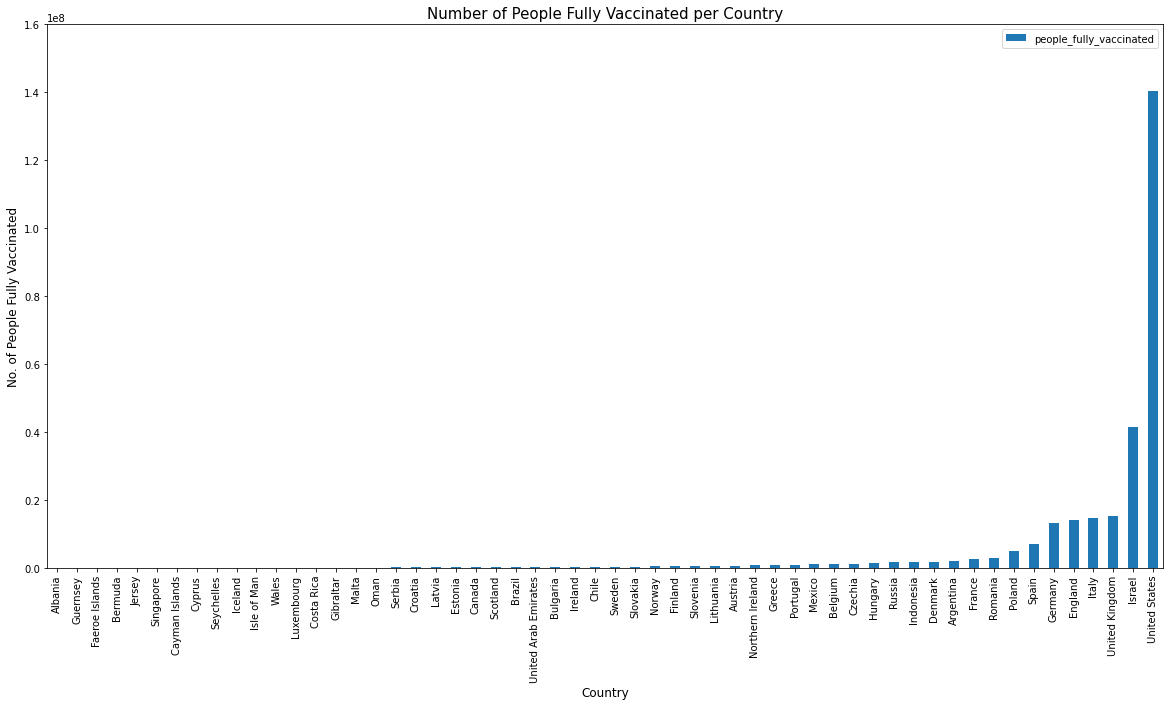

In [6]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated (sum) grouped by country
fil_no_zero_df_sort.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Country", fontsize=15)
plt.ylim(0,160000000)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated", fontsize=12)

# Store Cleaned Data in DataFrame 2
Question 1b: Determine the Number of People Fully Vaccinated per Hundred by Country and Graph


In [7]:
#Total number of people fully vaccinated per hundred by country
#Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
filtered_no_zero__hun_df=pd.DataFrame(filtered_no_zero_hun)
filtered_no_zero__hun_df

#Create a sorted DF
fil_no_zero_df_sort_hun=filtered_no_zero__hun_df.sort_values("people_fully_vaccinated_per_hundred")
fil_no_zero_df_sort_hun

,people_fully_vaccinated_per_hundred
country,
Austria,1
Romania,1
Portugal,1
Poland,1
Norway,1
Northern Ireland,1
Lithuania,1
Slovakia,1
Ireland,1


Text(0, 0.5, 'No. of People Fully Vaccinated per Hundred')

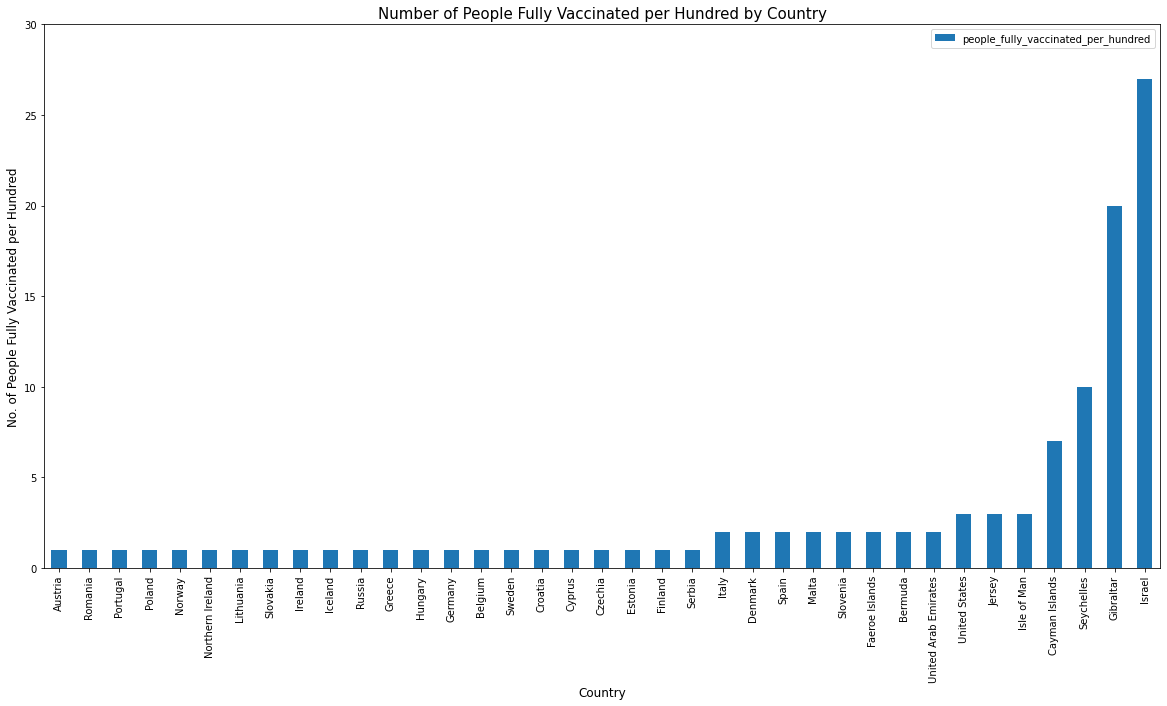

In [8]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated per hundred (sum) grouped by country
fil_no_zero_df_sort_hun.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=15)
plt.ylim(0,30)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=12)

# Store Cleaned Data in DataFrame 3
Question 2: Which vaccines and mixes are being distributed most /least and Graph

In [9]:
#Which vaccines and mixes are being distributed most /least. 
# Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_no_zero_dist=filtered_countries_vac.groupby(["vaccines"])["people_fully_vaccinated"].sum()
filtered_no_zero_dist_df=pd.DataFrame(filtered_no_zero_dist)
filtered_no_zero_dist_df

#Create a sorted DF
fil_no_zero_dist_sort=filtered_no_zero_dist_df.sort_values("people_fully_vaccinated")
fil_no_zero_dist_sort

,people_fully_vaccinated
vaccines,
"Oxford/AstraZeneca, Sinopharm/Beijing",22606
"Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",130927
"Oxford/AstraZeneca, Sinovac",212358
"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",250000
"Pfizer/BioNTech, Sinovac",380920
Sinovac,1730334
Pfizer/BioNTech,3300778
Sputnik V,3612283
"Oxford/AstraZeneca, Pfizer/BioNTech",31565542


Text(0, 0.5, 'Vaccine')

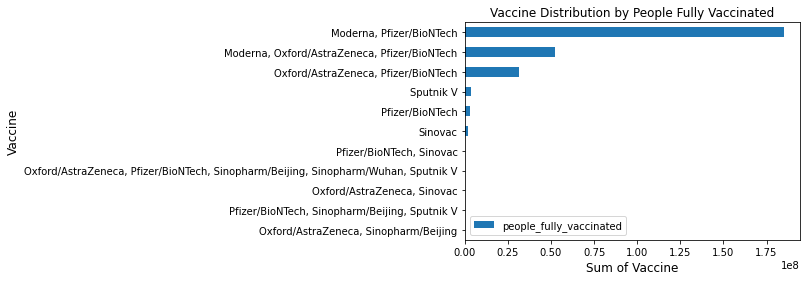

In [10]:
#Graph the results
fil_no_zero_dist_sort.plot.barh()
plt.title("Vaccine Distribution by People Fully Vaccinated", fontsize=12)
#plt.ylim(0,55000000)
plt.xlabel("Sum of Vaccine", fontsize=12)
plt.ylabel("Vaccine", fontsize=12)
#figsize=(20,10)

# Store Cleaned Data in DataFrame 4
Question 3a: What is the general global progression of people fully vaccinated and Graph

In [11]:
#People fully vaccinated counts with date chrono order x axis
# Graph Type:  Line Graph

#Create new DF that only contains country, date and people_fully_vaccinated columns and remove 0 from people_fully_vaccinated
daily_vac=covid_df[["date","country","people_fully_vaccinated"]].copy()
daily_vac=daily_vac[daily_vac["people_fully_vaccinated"] !=0]

#Convert dates to actual dates for my DF
daily_vac["date"]=pd.to_datetime(daily_vac["date"])

filtered_no_zero_daily=daily_vac.groupby(["date"])["people_fully_vaccinated"].sum()
filtered_no_zero_daily_df=pd.DataFrame(filtered_no_zero_daily)
filtered_no_zero_daily_df

#Create a sorted DF
fil_no_zero_daily_sort=filtered_no_zero_daily_df.sort_values("date")
fil_no_zero_daily_sort

,people_fully_vaccinated
date,
2021-01-03,43827
2021-01-04,2
2021-01-05,2
2021-01-06,2
2021-01-07,6
2021-01-08,11
2021-01-09,3650
2021-01-10,1038874
2021-01-11,849499


Text(0, 0.5, 'Count of People Vaccinated')

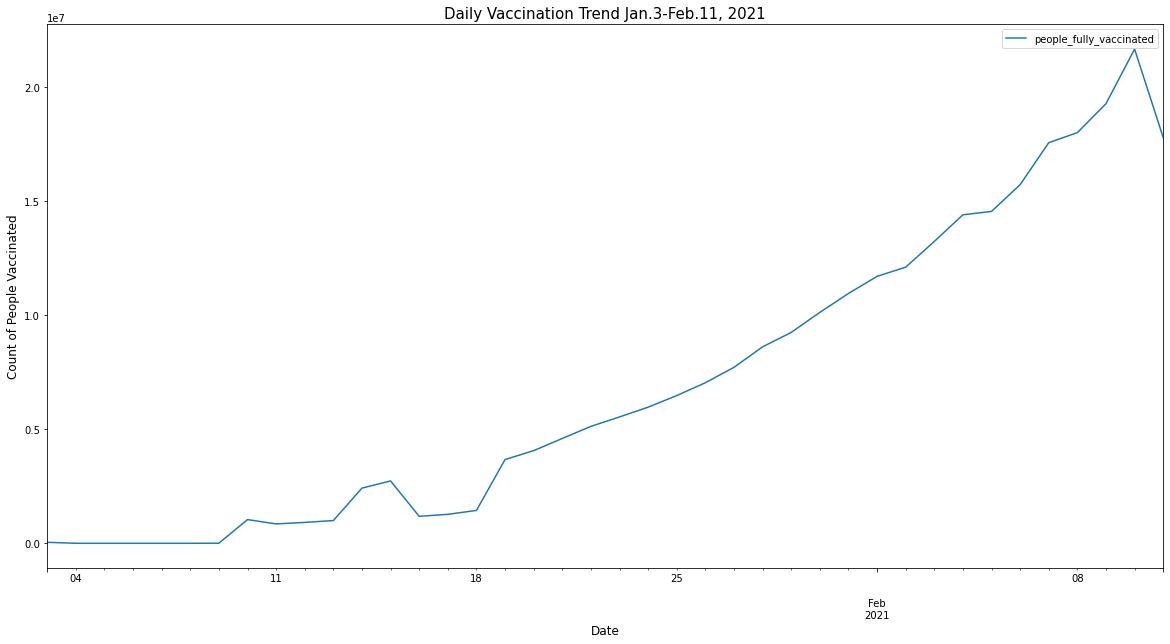

In [12]:
#Graph the results
fil_no_zero_daily_sort.plot.line(figsize=(20,10))
plt.title("Daily Vaccination Trend Jan.3-Feb.11, 2021", fontsize=15)
#plt.ylim(0,50)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count of People Vaccinated", fontsize=12)

# Store Cleaned Data in DataFrame 5
Question 3b: What is the general global progression of people fully vaccinated (TOP 5) and Graph